In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

In [2]:
df = pd.read_csv('mnist_test.csv')

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

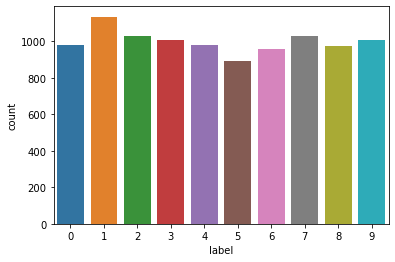

In [4]:
sns.countplot(df.label)

In [5]:
df.shape

(10000, 785)

In [6]:
df_sample = df.sample(500)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

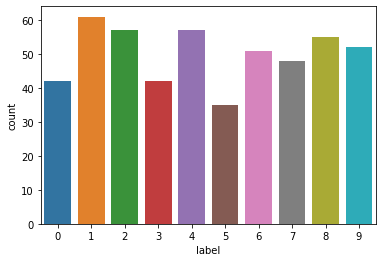

In [7]:
sns.countplot(df_sample.label)

In [8]:
X = df_sample.iloc[:,1:]
y = df_sample.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'SVM__C': [0.001, 0.1, 100, 1e5], 'SVM__gamma':[10, 1, 0.1, 0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             param_grid={'SVM__C': [0.001, 0.1, 100, 100000.0],
                         'SVM__gamma': [10, 1, 0.1, 0.01]})

In [16]:
print('score = %3.2f' % (grid.score(X_test, y_test)))
print('best parameters from train data: ', grid.best_params_)

score = 0.73
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [25]:
y_pred = grid.predict(X_test)

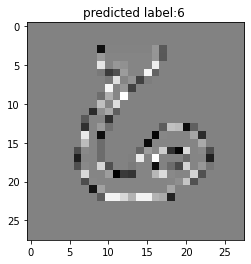

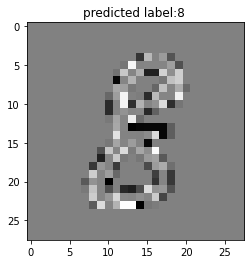

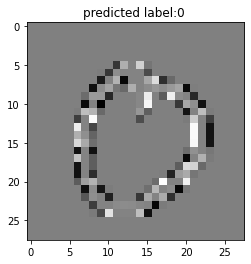

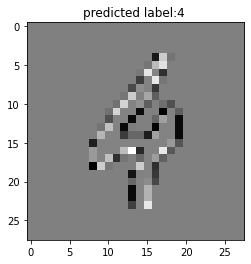

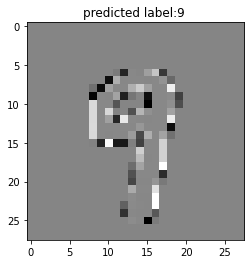

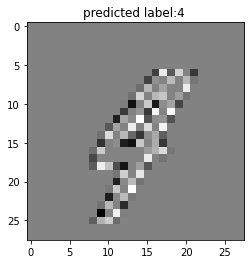

In [29]:
for i in (np.random.randint(0, 99, 6)):
    two_d = (np.reshape(X_test.values[i], (28,28)) * 255).astype(np.int8)
    plt.title('predicted label:{} '.format(y_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()